In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


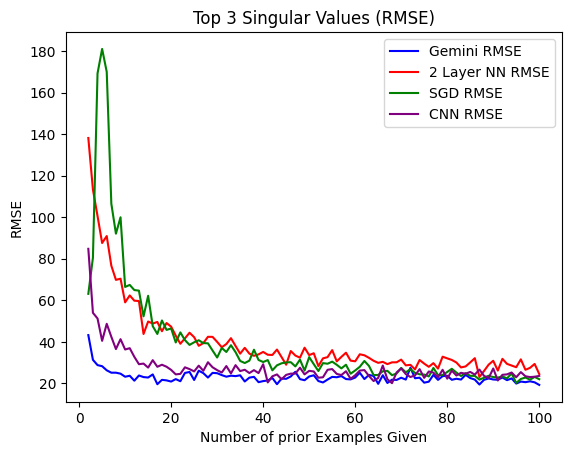

In [2]:
x_100 = range(2, 101)
LLM_k3_fivexfive_1Q = pd.read_csv('5x5_Results/LLM_Results_Gemini/LLM_results_Top_K_Matrix_5x5_k3_results.csv')
y = LLM_k3_fivexfive_1Q['average_rmse']
sns.lineplot(x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_Top_3 = pd.read_csv('5x5_Results/2Layer_Dense_NN_Results/5x5_k3_2NN_df_average_results.csv')
y = NN_Top_3['average_rmse']
sns.lineplot(x=x_100, y=y, color='red', label='2 Layer NN RMSE')


SGD_Top_3 = pd.read_csv('5x5_Results/SGD_Results/5x5_k3_SGD_df_average_results.csv')
y = SGD_Top_3['average_rmse']
sns.lineplot(x=x_100, y=y, color='green', label='SGD RMSE')

CNN_Top_3 = pd.read_csv('5x5_Results/CNN_Results/5x5_k3_CNN_df_average_results.csv')
y = CNN_Top_3['average_rmse']
sns.lineplot(x=x_100, y=y, color='purple', label='CNN RMSE')

#plt.yscale('log')
plt.xlabel('Number of prior Examples Given')
plt.ylabel('RMSE')
plt.title('Top 3 Singular Values (RMSE)')
plt.legend(loc='upper right')
#plt.savefig('RMSE_SVD_All_Models.pdf', format='pdf', dpi=100)
plt.show()

In [20]:
import pandas as pd

# Load data for each model
gemini_df = pd.read_csv('5x5_Results/LLM_Results_Gemini/LLM_results_Top_K_Matrix_5x5_k3_results.csv')
nn_df = pd.read_csv('5x5_Results/2Layer_Dense_NN_Results/5x5_k3_2NN_df_average_results.csv')
sgd_df = pd.read_csv('5x5_Results/SGD_Results/5x5_k3_SGD_df_average_results.csv')
cnn_df = pd.read_csv('5x5_Results/CNN_Results/5x5_k3_CNN_df_average_results.csv')

# Select the last 25 experiments and calculate the average RMSE
avg_gemini_rmse = gemini_df['average_rmse'].iloc[-25:].mean()
avg_nn_rmse = nn_df['average_rmse'].iloc[-25:].mean()
avg_sgd_rmse = sgd_df['average_rmse'].iloc[-25:].mean()
avg_cnn_rmse = cnn_df['average_rmse'].iloc[-25:].mean()

# Create summary table
summary_table = pd.DataFrame({
    'Model': ['Gemini', '2 Layer NN', 'SGD', 'CNN'],
    'Average RMSE (Last 25 Trials)': [avg_gemini_rmse, avg_nn_rmse, avg_sgd_rmse, avg_cnn_rmse]
})

# Display the table
print("Average RMSE from the Last 25 Experiments for Each Model")
print(summary_table)


Average RMSE from the Last 25 Experiments for Each Model
        Model  Average RMSE (Last 25 Trials)
0      Gemini                      21.788701
1  2 Layer NN                      28.871207
2         SGD                      23.579583
3         CNN                      24.372482


In [16]:
LLM_Every_Experiment = pd.read_csv('5x5_Results/LLM_Results_Gemini/LLM_results_Top_K_Matrix_5x5_k3_experiment_results.csv')
two_layer_result_df = pd.read_csv('5x5_Results/2Layer_Dense_NN_Results/5x5_k3_2NN_df_experiment_results.csv')
SGD_result_df = pd.read_csv('5x5_Results/SGD_Results/5x5_k3_SGD_df_experiment_results.csv')
CNN_result_df = pd.read_csv('5x5_Results/CNN_Results/5x5_k3_CNN_df_experiment_results.csv')

Final_First_Value = []
LLM_Predicted_First_Value = []
Two_Layer_Predicted_First_Value = []
SGD_Predicted_First_Value = []
CNN_Predicted_First_Value = []

for i in range(2, 101):
    #For the values, we are currenly going with only the first experiment until we look into this more
    LLM_Predicted_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['predicted_answers'].iloc[0]
    LLM_Actual_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['actual_answers'].iloc[0]

    #Get the predicted and actual values from the LLM
    LLM_Actual_List = LLM_Actual_List.strip('[]').split()
    LLM_final_actual_list = [float(num) for num in LLM_Actual_List]
    LLM_Predicted_List = LLM_Predicted_List.strip('[]').split()
    LLM_final_predict_list = [float(num) for num in LLM_Predicted_List]
    
    two_layer_result_predicted = two_layer_result_df[two_layer_result_df['i'] == i]['predicted_answers'].iloc[0]
    two_layer_result_actual = two_layer_result_df[two_layer_result_df['i'] == i]['actual_answers'].iloc[0]

    two_layer_result_predicted = two_layer_result_predicted.strip('[]').split()
    two_layer_final_predict_list = [float(num) for num in two_layer_result_predicted]
    two_layer_result_actual = two_layer_result_actual.strip('[]').split()
    two_layer_final_actual_list = [float(num) for num in two_layer_result_actual]
    
    SGD_result_predicted = SGD_result_df[SGD_result_df['i'] == i]['predicted_answers'].iloc[0]
    SGD_result_actual = SGD_result_df[SGD_result_df['i'] == i]['actual_answers'].iloc[0]

    SGD_result_predicted = SGD_result_predicted.strip('[]').split()
    SGD_final_predict_list = [float(num) for num in SGD_result_predicted]
    SGD_result_actual = SGD_result_actual.strip('[]').split()
    SGD_final_actual_list = [float(num) for num in SGD_result_actual]

    CNN_result_predicted = CNN_result_df[CNN_result_df['i'] == i]['predicted_answers'].iloc[0]
    CNN_result_actual = CNN_result_df[CNN_result_df['i'] == i]['actual_answers'].iloc[0]
    
    CNN_result_predicted = CNN_result_predicted.strip('[]').split()
    CNN_final_predict_list = [float(num) for num in CNN_result_predicted]
    CNN_result_actual = CNN_result_actual.strip('[]').split()
    CNN_final_actual_list = [float(num) for num in CNN_result_actual]
    
    #As of now we are only checking the top 1 singular value until we find a way to compare all of them
    if(LLM_final_actual_list != two_layer_final_actual_list or LLM_final_actual_list != SGD_final_actual_list or LLM_final_actual_list != CNN_final_actual_list):
        print("Problem")

    
    LLM_Predicted_First_Value.append(LLM_final_predict_list[0])
    Two_Layer_Predicted_First_Value.append(two_layer_final_predict_list[0])
    SGD_Predicted_First_Value.append(SGD_final_predict_list[0])
    CNN_Predicted_First_Value.append(CNN_final_predict_list[0])
    Final_First_Value.append(CNN_final_actual_list[0])

In [18]:
LLM', 'Two_Layer_NN', 'SGD', 'CNN', 'Actual'],
    'Avg_Top1': [average_LLM[0], average_Two_Layer[0], average_SGD[0], average_CNN[0], average_actual[0]],
    'Avg_Top2': [average_LLM[1], average_Two_Layer[1], average_SGD[1], average_CNN[1], average_actual[1]],
    'Avg_Top3': [average_LLM[2], average_Two_Layer[2], average_SGD[2], average_CNN[2], average_actual[2]]
})



          Model    Avg_Top1    Avg_Top2    Avg_Top3
0        Gemini  207.827312  153.234057  110.787531
1  Two_Layer_NN  174.983788  128.040649   90.991745
2           SGD  210.496398  154.110592  105.048702
3           CNN  196.242735  147.356188  101.622056
4        Actual  201.247457  151.864256  107.347796


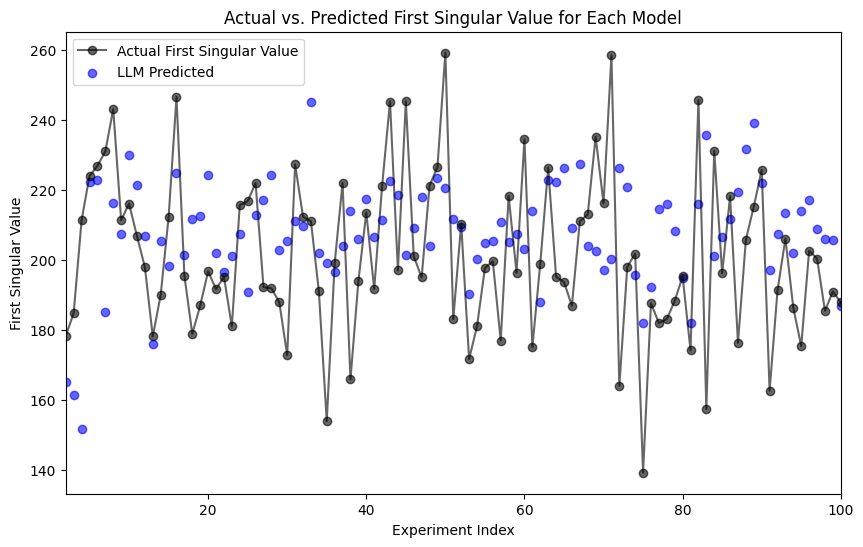

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x_values = range(2, 101)  

plt.plot(x_values, Final_First_Value, label='Actual First Singular Value', color='black', linestyle='-', marker='o', alpha=0.6)

plt.scatter(x_values, LLM_Predicted_First_Value, label='LLM Predicted', alpha=0.6, color='blue')

#plt.scatter(x_values, Two_Layer_Predicted_First_Value, label='Two-Layer NN Predicted', alpha=0.6, color='green')

#plt.scatter(x_values, SGD_Predicted_First_Value, label='SGD Predicted', alpha=0.6, color='red')

#plt.scatter(x_values, CNN_Predicted_First_Value, label='CNN Predicted', alpha=0.6, color='purple')

plt.xlim(2, 100)

plt.xlabel('Experiment Index')
plt.ylabel('First Singular Value')
plt.title('Actual vs. Predicted First Singular Value for Each Model')
plt.legend()
plt.show()


In [10]:
#Total avergae among all first values
actual_average_per_experiment = []
LLM_predicted_average_per_experiment = []
two_layer_predicted_average_per_experiment = []
CNN_predicted_average_per_experiment = []
SGD_predicted_average_per_experiment = []

#Open csvs that have data for each individual experiment
LLM_Every_Experiment = pd.read_csv('5x5_Results/LLM_Results_Gemini/LLM_results_Top_K_Matrix_5x5_k3_experiment_results.csv')
two_layer_every_experiment = pd.read_csv('5x5_Results/2Layer_Dense_NN_Results/5x5_k3_2NN_df_experiment_results.csv')
CNN_every_experiment = pd.read_csv('5x5_Results/CNN_Results/5x5_k3_CNN_df_experiment_results.csv')
SGD_every_experiment = pd.read_csv('5x5_Results/SGD_Results/5x5_k3_SGD_df_experiment_results.csv')

LLM_17_Demonstrations = []
two_layer_Demonstrations = []
CNN_17_Demonstrations = []
SGD_17_Demonstrations = []
actual_17_Demonstrations = []

for i in range(2, 101):

    #For each number of prior examples, select the corresponding predicted answers and actual answers
    LLM_Predicted_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['predicted_answers']
    two_layer_predicted_list = two_layer_every_experiment[two_layer_every_experiment['i'] == i]['predicted_answers']
    CNN_predicted_list = CNN_every_experiment[CNN_every_experiment['i'] == i]['predicted_answers']
    SGD_predicted_list = SGD_every_experiment[SGD_every_experiment['i'] == i]['predicted_answers']
    
    Actual_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['actual_answers']


    #Each of these stores all the values for the first singular value, second singular value, and third singular value
    first_singular_value = []
    second_singular_value = []
    third_singular_value = []
    for j in LLM_Predicted_List:
        
        j = j.strip('[]').split()
        j = [float(num) for num in j]
    
        first_singular_value.append(j[0])
        second_singular_value.append(j[1])
        third_singular_value.append(j[2])

        if(i == 17):
            LLM_17_Demonstrations.append(j)

    #Calculate the average among all of these values, here it is specifically doing the first value
    LLM_predicted_average_per_experiment.append(np.array(first_singular_value).mean())


    #Do this again
    first_singular_value = []
    second_singular_value = []
    third_singular_value = []
    for j in Actual_List:
        
        j = j.strip('[]').split()
        j = [float(num) for num in j]
    
        first_singular_value.append(j[0])
        second_singular_value.append(j[1])
        third_singular_value.append(j[2])
        
        if(i == 17):
            actual_17_Demonstrations.append(j)
            
    actual_average_per_experiment.append(np.array(first_singular_value).mean())

    first_singular_value = []
    second_singular_value = []
    third_singular_value = []
    for j in two_layer_predicted_list:
        
        j = j.strip('[]').split()
        j = [float(num) for num in j]
    
        first_singular_value.append(j[0])
        second_singular_value.append(j[1])
        third_singular_value.append(j[2])

        if(i == 17):
            two_layer_Demonstrations.append(j)
            
    two_layer_predicted_average_per_experiment.append(np.array(first_singular_value).mean())


    first_singular_value = []
    second_singular_value = []
    third_singular_value = []
    for j in CNN_predicted_list:
        
        j = j.strip('[]').split()
        j = [float(num) for num in j]
    
        first_singular_value.append(j[0])
        second_singular_value.append(j[1])
        third_singular_value.append(j[2])

        if(i == 17):
            CNN_17_Demonstrations.append(j)

    CNN_predicted_average_per_experiment.append(np.array(first_singular_value).mean())


    first_singular_value = []
    second_singular_value = []
    third_singular_value = []
    for j in SGD_predicted_list:
        
        j = j.strip('[]').split()
        j = [float(num) for num in j]
        
    
        first_singular_value.append(j[0])
        second_singular_value.append(j[1])
        third_singular_value.append(j[2])
        
        if(i == 17):
            SGD_17_Demonstrations.append(j)

    SGD_predicted_average_per_experiment.append(np.array(first_singular_value).mean())


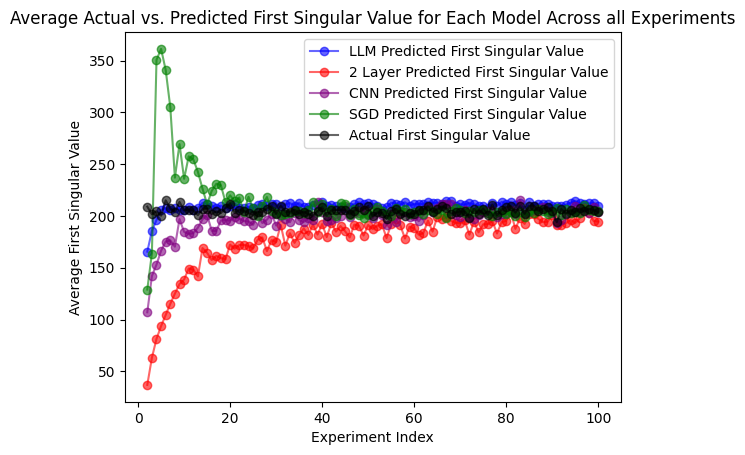

In [11]:
plt.plot(x_values, LLM_predicted_average_per_experiment, label='LLM Predicted First Singular Value', color='blue', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, two_layer_predicted_average_per_experiment, label='2 Layer Predicted First Singular Value', color='red', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, CNN_predicted_average_per_experiment, label='CNN Predicted First Singular Value', color='purple', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, SGD_predicted_average_per_experiment, label='SGD Predicted First Singular Value', color='green', linestyle='-', marker='o', alpha=0.6)

plt.plot(x_values, actual_average_per_experiment, label='Actual First Singular Value', color='black', linestyle='-', marker='o', alpha=0.6)

plt.xlabel('Experiment Index')
plt.ylabel('Average First Singular Value')
plt.title('Average Actual vs. Predicted First Singular Value for Each Model Across all Experiments')

plt.legend()
plt.show()

[212.60000688, 193.39938082, 100.08077249] [211.64959489, 185.20026212, 120.06601335] [175.0063, 131.14293, 82.170586] [218.27243, 162.48857, 107.5498] [138.99294174, 117.01476308, 37.45174773]
[212.60000688, 193.39938082, 100.08077249] [211.64959489, 185.20026212, 120.06601335] [175.0063, 131.14293, 82.170586] [218.27243, 162.48857, 107.5498] [138.99294174, 117.01476308, 37.45174773]


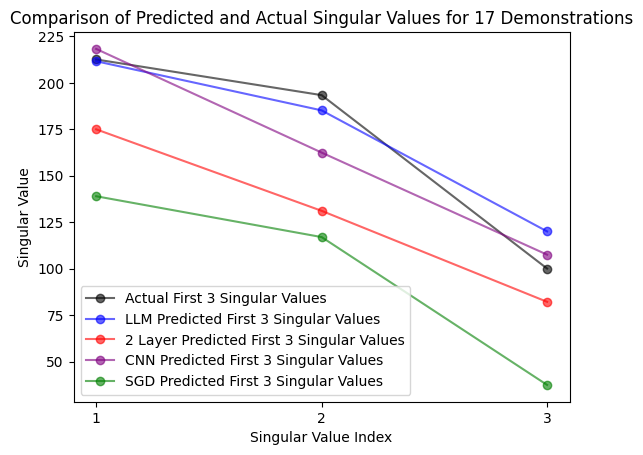

In [12]:
import random

#Pick 2 to 3 random experiments at 17 demonstrations
x_axis_three = range(1,4)
index = random.randint(0, 49)
x_axis_three = range(1, 4)
actual_values = actual_17_Demonstrations[index]
LLM_values = LLM_17_Demonstrations[index]
two_layer_values = two_layer_Demonstrations[index]
CNN_values = CNN_17_Demonstrations[index]
SGD_values = SGD_17_Demonstrations[index]


#We use 17 demonstrations herme but it can really be any amount. We take the same random index from all of these demonstrations
print(actual_values, LLM_values, two_layer_values, CNN_values, SGD_values)

x_axis_three = range(1, 4)
actual_values = actual_17_Demonstrations[index]
LLM_values = LLM_17_Demonstrations[index]
two_layer_values = two_layer_Demonstrations[index]
CNN_values = CNN_17_Demonstrations[index]
SGD_values = SGD_17_Demonstrations[index]

print(actual_values, LLM_values, two_layer_values, CNN_values, SGD_values)

#Then we plot them all against each other.
plt.plot(x_axis_three, actual_values, label='Actual First 3 Singular Values', color='black', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_axis_three, LLM_values, label='LLM Predicted First 3 Singular Values', color='blue', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_axis_three, two_layer_values, label='2 Layer Predicted First 3 Singular Values', color='red', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_axis_three, CNN_values, label='CNN Predicted First 3 Singular Values', color='purple', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_axis_three, SGD_values, label='SGD Predicted First 3 Singular Values', color='green', linestyle='-', marker='o', alpha=0.6)

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Comparison of Predicted and Actual Singular Values for 17 Demonstrations')
plt.xticks([1, 2, 3]) 
plt.legend()

# Show the plot
plt.show()


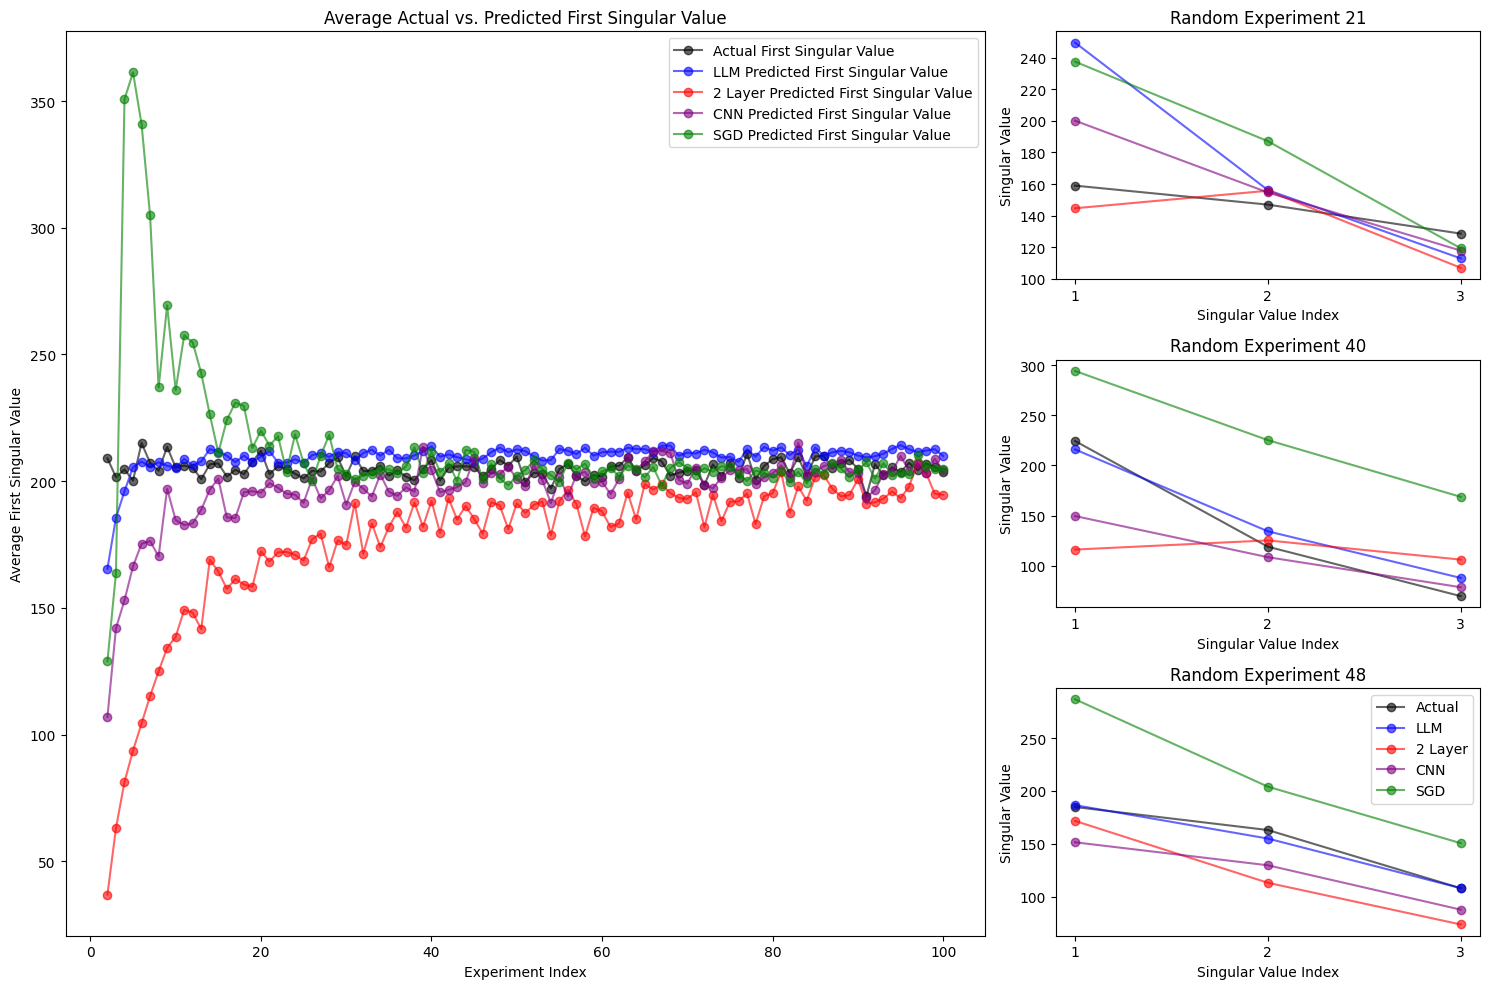

In [13]:
#We combine the 2 previous plots here. The main plot shows the average predicted vs average actual
#For the first singular value across all experimnts per demonstration

fig = plt.figure(figsize=(15, 10))

#Main plot (left side)
#Main plot is showing this
ax_main = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=2)
ax_main.plot(x_values, actual_average_per_experiment, label='Actual First Singular Value', color='black', linestyle='-', marker='o', alpha=0.6)
ax_main.plot(x_values, LLM_predicted_average_per_experiment, label='LLM Predicted First Singular Value', color='blue', linestyle='-', marker='o', alpha=0.6)
ax_main.plot(x_values, two_layer_predicted_average_per_experiment, label='2 Layer Predicted First Singular Value', color='red', linestyle='-', marker='o', alpha=0.6)
ax_main.plot(x_values, CNN_predicted_average_per_experiment, label='CNN Predicted First Singular Value', color='purple', linestyle='-', marker='o', alpha=0.6)
ax_main.plot(x_values, SGD_predicted_average_per_experiment, label='SGD Predicted First Singular Value', color='green', linestyle='-', marker='o', alpha=0.6)
ax_main.set_xlabel('Experiment Index')
ax_main.set_ylabel('Average First Singular Value')
ax_main.set_title('Average Actual vs. Predicted First Singular Value')
ax_main.legend()

#Generate and plot three random subplots (right side)
#These sub plots are of 3 random experiments. 
for i in range(3):
    ax = plt.subplot2grid((3, 3), (i, 2))
    
    index = random.randint(0, len(actual_17_Demonstrations) - 1)
    x_axis_three = range(1, 4)
    actual_values = actual_17_Demonstrations[index]
    LLM_values = LLM_17_Demonstrations[index]
    two_layer_values = two_layer_Demonstrations[index]
    CNN_values = CNN_17_Demonstrations[index]
    SGD_values = SGD_17_Demonstrations[index]
    
    ax.plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
    ax.plot(x_axis_three, LLM_values, label='LLM', color='blue', linestyle='-', marker='o', alpha=0.6)
    ax.plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
    ax.plot(x_axis_three, CNN_values, label='CNN', color='purple', linestyle='-', marker='o', alpha=0.6)
    ax.plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)
    
    ax.set_xlabel('Singular Value Index')
    ax.set_ylabel('Singular Value')
    ax.set_title(f'Random Experiment {index+1}')
    ax.set_xticks([1, 2, 3])
    if i == 2:  
        #Only display legend on the last subplot to avoid clutter since there are a lot of plots.
        ax.legend()

plt.tight_layout()
#plt.savefig('plot.pdf', format='pdf', dpi=100)
plt.show()

In [14]:
import matplotlib.pyplot as plt

indices = [35, 6, 18]

for i, index in enumerate(indices):
    x_axis_three = range(1, 4)
    actual_values = actual_17_Demonstrations[index]
    LLM_values = LLM_17_Demonstrations[index]
    two_layer_values = two_layer_Demonstrations[index]
    CNN_values = CNN_17_Demonstrations[index]
    SGD_values = SGD_17_Demonstrations[index]

    axs[i].plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, LLM_values, label='LLM', color='blue', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, CNN_values, label='CNN', color='purple', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)

    axs[i].set_xlabel('Singular Value Index')
    axs[i].set_ylabel('Singular Value')
    axs[i].set_title(f'Experiment {index+1}')
    axs[i].set_xticks([1, 2, 3])

    if i == 2:  # Only display legend on the last subplot to avoid clutter
        axs[i].legend()

plt.tight_layout()
#plt.savefig('subplots.pdf', format='pdf', dpi=100)
plt.show()

NameError: name 'axs' is not defined

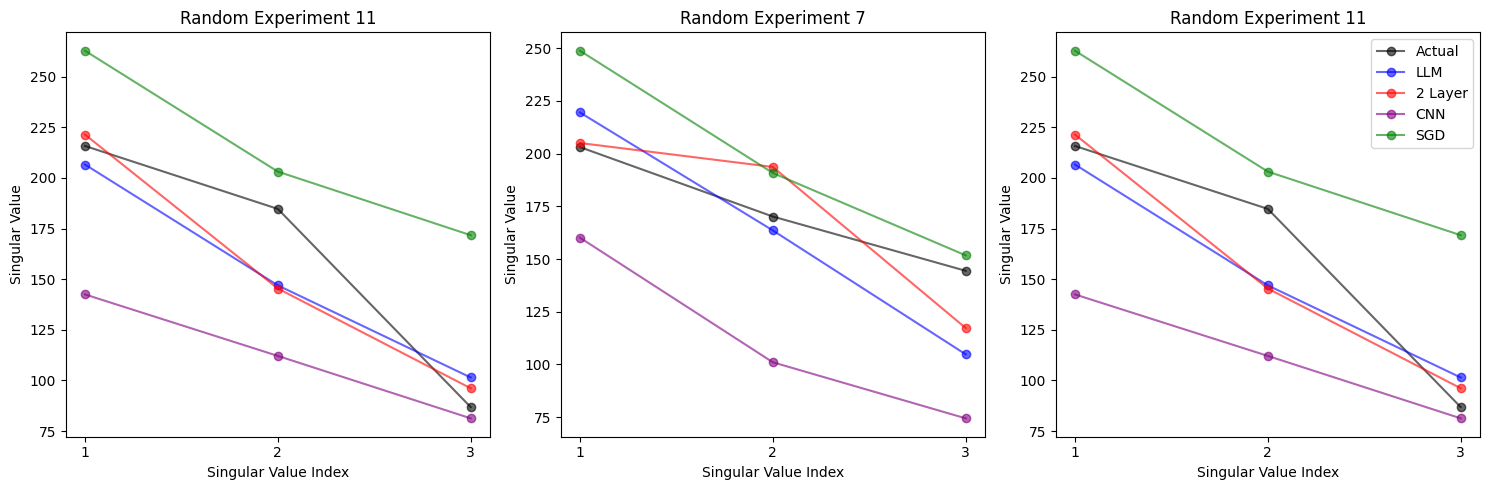

In [15]:
import matplotlib.pyplot as plt
import random


fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 grid of subplots

for i in range(3):
    index = random.randint(0, len(actual_17_Demonstrations) - 1)
    x_axis_three = range(1, 4)
    actual_values = actual_17_Demonstrations[index]
    LLM_values = LLM_17_Demonstrations[index]
    two_layer_values = two_layer_Demonstrations[index]
    CNN_values = CNN_17_Demonstrations[index]
    SGD_values = SGD_17_Demonstrations[index]

    axs[i].plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, LLM_values, label='LLM', color='blue', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, CNN_values, label='CNN', color='purple', linestyle='-', marker='o', alpha=0.6)
    axs[i].plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)

    axs[i].set_xlabel('Singular Value Index')
    axs[i].set_ylabel('Singular Value')
    axs[i].set_title(f'Random Experiment {index+1}')
    axs[i].set_xticks([1, 2, 3])

    if i == 2:  
        axs[i].legend()

plt.tight_layout()
#plt.savefig('subplots.pdf', format='pdf', dpi=100)  
plt.show()


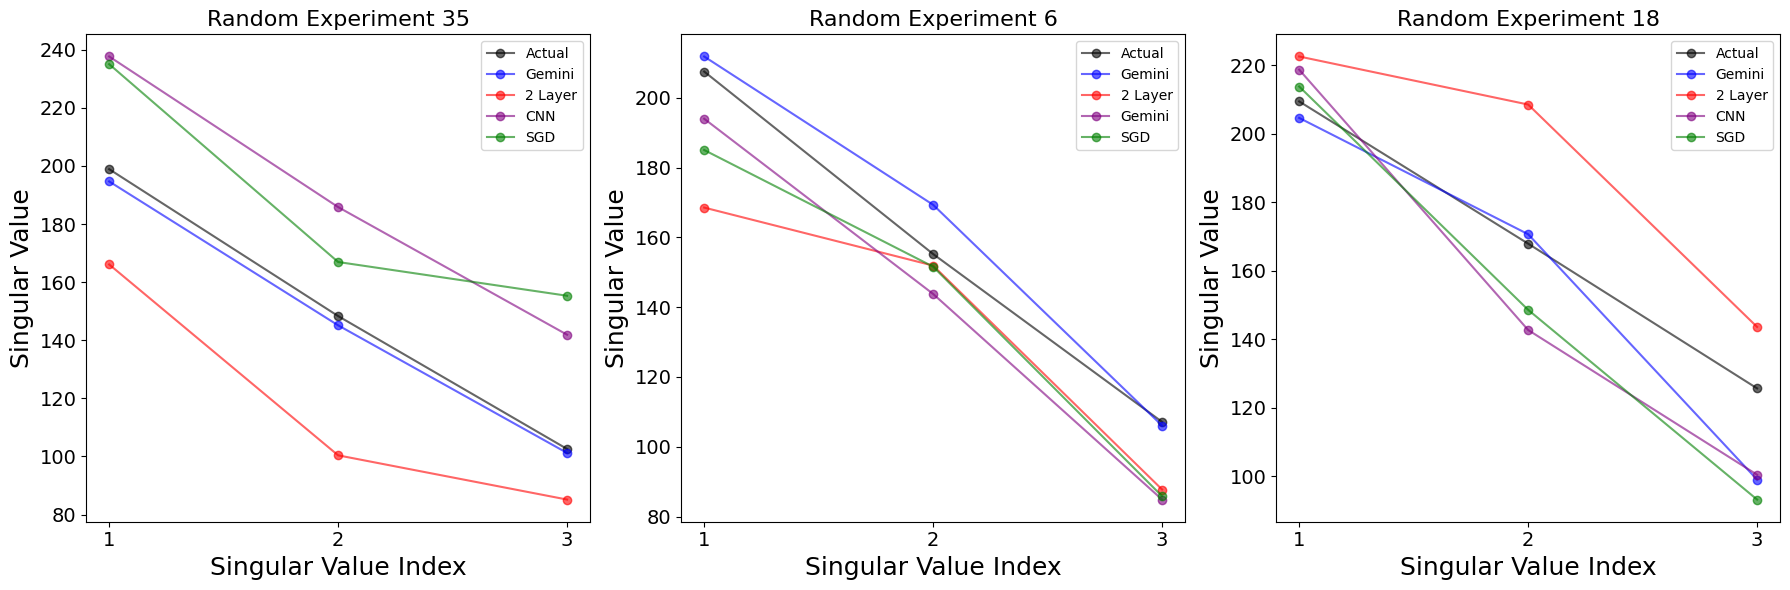

In [16]:
import matplotlib.pyplot as plt

title_font_size = 16
label_font_size = 18
legend_font_size = 10
tick_label_font_size = 14

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

x_axis_three = range(1, 4)
actual_values = actual_17_Demonstrations[34]
LLM_values = LLM_17_Demonstrations[34]
two_layer_values = two_layer_Demonstrations[34]
CNN_values = CNN_17_Demonstrations[34]
SGD_values = SGD_17_Demonstrations[34]

axs[0].plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
axs[0].plot(x_axis_three, LLM_values, label='Gemini', color='blue', linestyle='-', marker='o', alpha=0.6)
axs[0].plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
axs[0].plot(x_axis_three, CNN_values, label='CNN', color='purple', linestyle='-', marker='o', alpha=0.6)
axs[0].plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)

axs[0].set_xlabel('Singular Value Index', fontsize=label_font_size)
axs[0].set_ylabel('Singular Value', fontsize=label_font_size)
axs[0].set_title('Random Experiment 35', fontsize=title_font_size)
axs[0].set_xticks([1, 2, 3])
axs[0].tick_params(axis='x', labelsize=tick_label_font_size)
axs[0].tick_params(axis='y', labelsize=tick_label_font_size)

# Experiment 5 (Index 5 in zero-based indexing)
x_axis_three = range(1, 4)
actual_values = actual_17_Demonstrations[5]
LLM_values = LLM_17_Demonstrations[5]
two_layer_values = two_layer_Demonstrations[5]
CNN_values = CNN_17_Demonstrations[5]
SGD_values = SGD_17_Demonstrations[5]

axs[1].plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
axs[1].plot(x_axis_three, LLM_values, label='Gemini', color='blue', linestyle='-', marker='o', alpha=0.6)
axs[1].plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
axs[1].plot(x_axis_three, CNN_values, label='Gemini', color='purple', linestyle='-', marker='o', alpha=0.6)
axs[1].plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)

axs[1].set_xlabel('Singular Value Index', fontsize=label_font_size)
axs[1].set_ylabel('Singular Value', fontsize=label_font_size)
axs[1].set_title('Random Experiment 6', fontsize=title_font_size)
axs[1].set_xticks([1, 2, 3])
axs[1].tick_params(axis='x', labelsize=tick_label_font_size)
axs[1].tick_params(axis='y', labelsize=tick_label_font_size)

# Experiment 17 (Index 17 in zero-based indexing)
x_axis_three = range(1, 4)
actual_values = actual_17_Demonstrations[17]
LLM_values = LLM_17_Demonstrations[17]
two_layer_values = two_layer_Demonstrations[17]
CNN_values = CNN_17_Demonstrations[17]
SGD_values = SGD_17_Demonstrations[17]

axs[2].plot(x_axis_three, actual_values, label='Actual', color='black', linestyle='-', marker='o', alpha=0.6)
axs[2].plot(x_axis_three, LLM_values, label='Gemini', color='blue', linestyle='-', marker='o', alpha=0.6)
axs[2].plot(x_axis_three, two_layer_values, label='2 Layer', color='red', linestyle='-', marker='o', alpha=0.6)
axs[2].plot(x_axis_three, CNN_values, label='CNN', color='purple', linestyle='-', marker='o', alpha=0.6)
axs[2].plot(x_axis_three, SGD_values, label='SGD', color='green', linestyle='-', marker='o', alpha=0.6)

axs[2].set_xlabel('Singular Value Index', fontsize=label_font_size)
axs[2].set_ylabel('Singular Value', fontsize=label_font_size)
axs[2].set_title('Random Experiment 18', fontsize=title_font_size)
axs[2].set_xticks([1, 2, 3])
axs[2].tick_params(axis='x', labelsize=tick_label_font_size)
axs[2].tick_params(axis='y', labelsize=tick_label_font_size)

# Add legend
for ax in axs:
    ax.legend(fontsize=legend_font_size)

plt.tight_layout()
plt.savefig('SVD_Specific_Plot.pdf', format='pdf', dpi=100)  
plt.show()


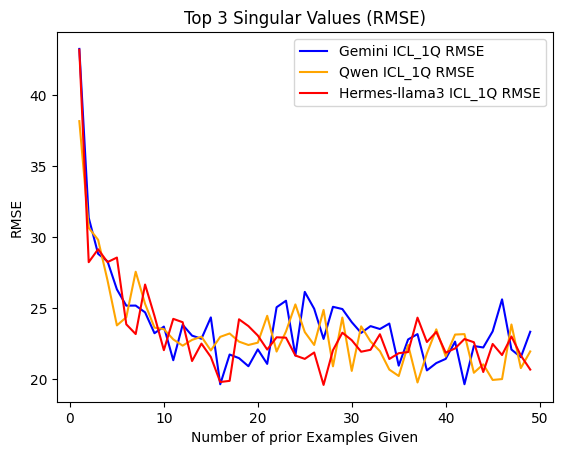

In [30]:
x_50 = range(1, 50)  # First 50 entries

# Load and slice the first 50 entries from the Gemini results
LLM_k3_fivexfive_1Q = pd.read_csv('5x5_Results/LLM_Results_Gemini/LLM_results_Top_K_Matrix_5x5_k3_results.csv')
y_gemini = LLM_k3_fivexfive_1Q['average_rmse'][:49]
sns.lineplot(x=x_50, y=y_gemini, color='blue', label='Gemini ICL_1Q RMSE')

# Load and slice the first 50 entries from the Qwen results
LLM_k3_fivexfive_1Q = pd.read_csv('5x5_Results/LLM_Results_Qwen/qwen_average_results_top_k_singular_values.csv')
y_qwen = LLM_k3_fivexfive_1Q['average_rmse'][:49]
sns.lineplot(x=x_50, y=y_qwen, color='orange', label='Qwen ICL_1Q RMSE')

LLM_k3_fivexfive_1Q = pd.read_csv('5x5_Results/LLM_Results_llama/hermes-llama3_average_results_top_k_singular_values.csv')
y_llama = LLM_k3_fivexfive_1Q['average_rmse'][:49]
sns.lineplot(x=x_50, y=y_llama, color='red', label='Hermes-llama3 ICL_1Q RMSE')

#plt.yscale('log')
plt.xlabel('Number of prior Examples Given')
plt.ylabel('RMSE')
plt.title('Top 3 Singular Values (RMSE)')
plt.legend(loc='upper right')
plt.savefig('RMSE_SVD_Open_Source_Models.pdf', format='pdf', dpi=100)
plt.show()


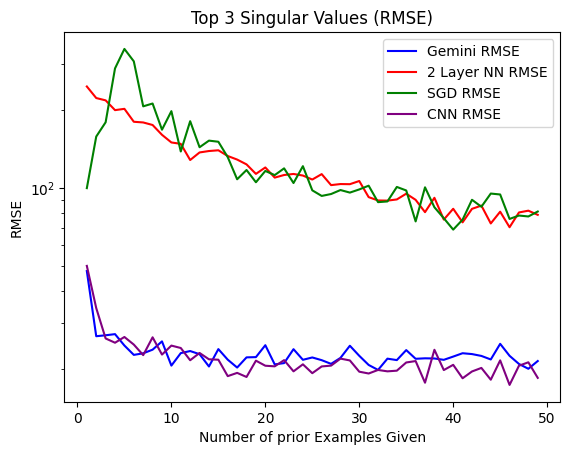

In [31]:
x_100 = range(1, 50)
LLM_k3_fivexfive_1Q = pd.read_csv('10x10_Results/LLM_Results/LLM_results_Top_K_Matrix_10x10_k3.txt_k_average_results.csv')
y = LLM_k3_fivexfive_1Q['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_Top_3 = pd.read_csv('10x10_Results/2_Dense_NN_Results/10x10_k3_2NN_df_average_results.csv')
y = NN_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_Top_3 = pd.read_csv('10x10_Results/SGD_Results/10x10_k3_SGD_df_average_results_new.csv')
y = SGD_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='green', label='SGD RMSE')

CNN_Top_3 = pd.read_csv('10x10_Results/CNN_Results/10x10_k3_CNN_df_average_results.csv')
y = CNN_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='purple', label='CNN RMSE')

plt.yscale('log')
plt.xlabel('Number of prior Examples Given')
plt.ylabel('RMSE')
plt.title('Top 3 Singular Values (RMSE)')
plt.legend(loc='upper right')
plt.savefig('RMSE_SVD_10x10.pdf', format='pdf', dpi=100)
plt.show()

In [26]:
import pandas as pd

gemini_df = pd.read_csv('10x10_Results/LLM_Results/LLM_results_Top_K_Matrix_10x10_k3.txt_k_average_results.csv')
nn_df = pd.read_csv('10x10_Results/2_Dense_NN_Results/10x10_k3_2NN_df_average_results.csv')
sgd_df = pd.read_csv('10x10_Results/SGD_Results/10x10_k3_SGD_df_average_results_new.csv')
cnn_df = pd.read_csv('10x10_Results/CNN_Results/10x10_k3_CNN_df_average_results.csv')

# Select trials 25 to 50 and calculate the average RMSE
avg_gemini_rmse = gemini_df['average_rmse'].iloc[34:50].mean()
avg_nn_rmse = nn_df['average_rmse'].iloc[34:50].mean()
avg_sgd_rmse = sgd_df['average_rmse'].iloc[34:50].mean()
avg_cnn_rmse = cnn_df['average_rmse'].iloc[34:50].mean()

# Create summary table
summary_table = pd.DataFrame({
    'Model': ['Gemini', '2 Layer NN', 'SGD', 'CNN'],
    'Average RMSE (Trials 35 to 50)': [avg_gemini_rmse, avg_nn_rmse, avg_sgd_rmse, avg_cnn_rmse]
})

# Display the table
print("Average RMSE from Trials 35 to 50 for Each Model")
print(summary_table)


Average RMSE from Trials 35 to 50 for Each Model
        Model  Average RMSE (Trials 35 to 50)
0      Gemini                       22.317223
1  2 Layer NN                       81.395695
2         SGD                       82.747149
3         CNN                       19.984936


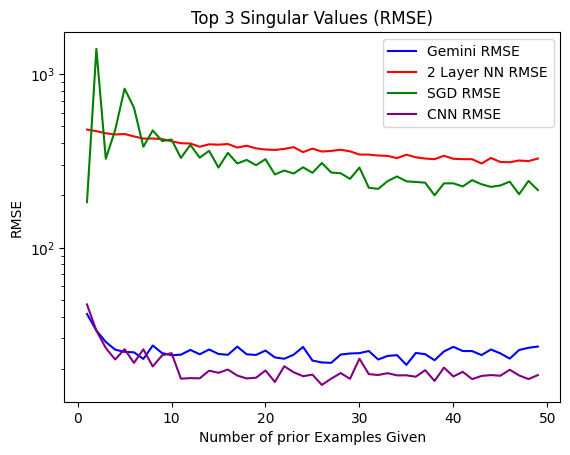

In [32]:
x_100 = range(1, 50)
LLM_k3_fivexfive_1Q = pd.read_csv('25x25_Results/LLM_Results/LLM_results_Top_K_Matrix_25x25_k3.txt_k_average_results.csv')
y = LLM_k3_fivexfive_1Q['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_Top_3 = pd.read_csv('25x25_Results/2_Dense_NN_Results/25x25_k3_2NN_df_average_results.csv')
y = NN_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_Top_3 = pd.read_csv('25x25_Results/SGD_Results/25x25_k3_SGD_df_average_results_new.csv')
y = SGD_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='green', label='SGD RMSE')

CNN_Top_3 = pd.read_csv('25x25_Results/CNN_Results/25x25_k3_CNN_df_average_results.csv')
y = CNN_Top_3['average_rmse'][:49]
sns.lineplot(x=x_100, y=y, color='purple', label='CNN RMSE')

plt.yscale('log')
plt.xlabel('Number of prior Examples Given')
plt.ylabel('RMSE')
plt.title('Top 3 Singular Values (RMSE)')
plt.legend(loc='upper right')
plt.savefig('RMSE_SVD_25x25.pdf', format='pdf', dpi=100)
plt.show()

In [27]:
import pandas as pd

gemini_df = pd.read_csv('25x25_Results/LLM_Results/LLM_results_Top_K_Matrix_25x25_k3.txt_k_average_results.csv')
nn_df = pd.read_csv('25x25_Results/2_Dense_NN_Results/25x25_k3_2NN_df_average_results.csv')
sgd_df = pd.read_csv('25x25_Results/SGD_Results/25x25_k3_SGD_df_average_results_new.csv')
cnn_df = pd.read_csv('25x25_Results/CNN_Results/25x25_k3_CNN_df_average_results.csv')

# Select trials 25 to 50 and calculate the average RMSE
avg_gemini_rmse = gemini_df['average_rmse'].iloc[24:50].mean()
avg_nn_rmse = nn_df['average_rmse'].iloc[24:50].mean()
avg_sgd_rmse = sgd_df['average_rmse'].iloc[24:50].mean()
avg_cnn_rmse = cnn_df['average_rmse'].iloc[24:50].mean()

# Create summary table
summary_table = pd.DataFrame({
    'Model': ['Gemini', '2 Layer NN', 'SGD', 'CNN'],
    'Average RMSE (Trials 35 to 50)': [avg_gemini_rmse, avg_nn_rmse, avg_sgd_rmse, avg_cnn_rmse]
})

print("Average RMSE from Trials 35 to 50 for Each Model")
print(summary_table)


Average RMSE from Trials 35 to 50 for Each Model
        Model  Average RMSE (Trials 35 to 50)
0      Gemini                       24.234574
1  2 Layer NN                      334.379760
2         SGD                      241.310389
3         CNN                       18.497619
